### __VAISHNAVI PRAKASH KALGUTKAR__<br>
### __THE SPARKS FOUNDATION__<br>
### __Data Science and Business Analytics__<br>
### __Task 3: Exploratory Data Analysis__<br>
### __Problem statement__ :Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’ As a business manager, try to find out the weak areas where you can work to make more profit. 

In [160]:
#importing required libraries
import numpy as np #linear algebra
import pandas as pd  #data processing
#data visualizataion
import matplotlib.pyplot as plt
import seaborn as sns
# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [161]:
import warnings
warnings.filterwarnings("ignore")

### Importing Data

In [162]:
#loading dataset from csv file into s_data dataframe
s_data=pd.read_csv("SampleSuperstore.csv")


### Exploring the dataset

In [163]:
#get the dataframe dimension
s_data.shape

(9994, 13)

In [164]:
#displaying first 10 rows from the dataset
s_data.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [165]:
#get column info to check out datatypes,missing values and count
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 702.8+ KB


In [166]:
#to check out summary statistics of numeric columns
s_data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Data Manipulation

In [167]:
# get the count of total number of  null values for each column
s_data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [168]:
#check for duplicate rows 
duplicate=s_data.duplicated(subset=None)
print(duplicate.sum())
s_data[duplicate]

17


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
5905,Same Day,Home Office,United States,San Francisco,California,94122,West,Office Supplies,Labels,41.400,4,0.0,19.8720
6146,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.0,3.1752
6334,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
6357,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
7608,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416


In [169]:
#remove duplicate rows 
s_data.drop_duplicates(inplace=True)
duplicate1=s_data.duplicated(subset=None)
print(duplicate1.sum())

0


In [170]:
#new dimension after removing duplicate rows
s_data.shape

(9977, 13)

### Visualization of Data

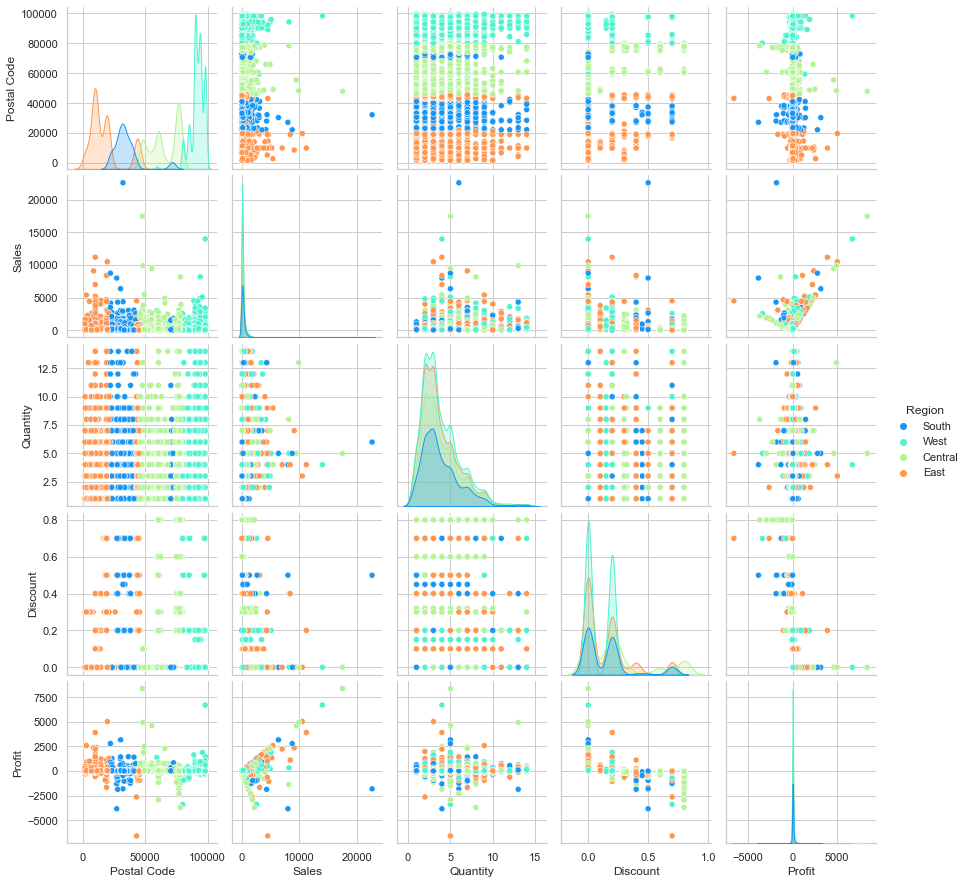

In [171]:
#pair plot with hue Region for pairwise distribution
sns.set_style("whitegrid")
sns.pairplot(s_data,hue="Region",palette='rainbow')

<AxesSubplot:>

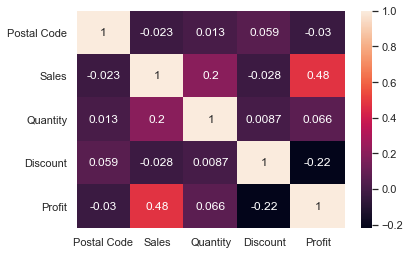

In [172]:
#represents the correlation between the numeric columns
sns.heatmap(s_data.corr(),annot=True)

Sales has highest positive(0.48) relation with profit and about 0.2 with the  quantity

<AxesSubplot:title={'center':'Shipment mode'}, xlabel='Ship Mode', ylabel='Count'>

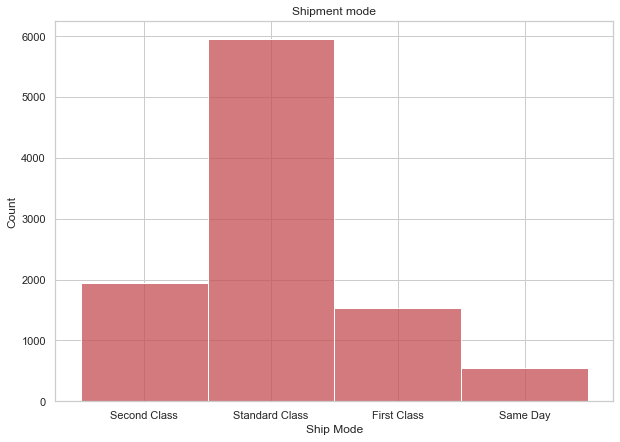

In [173]:
#getting the mode of shipment of goods
fig=plt.figure(figsize=(10,7))
plt.title('Shipment mode')

sns.histplot(x=s_data['Ship Mode'],color='r')

([<matplotlib.patches.Wedge at 0x22afcb08>,
 [Text(-0.0673271932456651, 1.0979376344081029, 'Consumer'),
  Text(-0.5263377375767172, -0.9659029899542826, 'Corporate'),
  Text(0.9318767010824192, -0.5844705415842171, 'Home Office')],
 [Text(-0.0367239235885446, 0.5988750733135106, '51.9%'),
  Text(-0.2870933114054821, -0.5268561763386995, '30.2%'),
  Text(0.5082963824085922, -0.3188021135913911, '17.8%')])

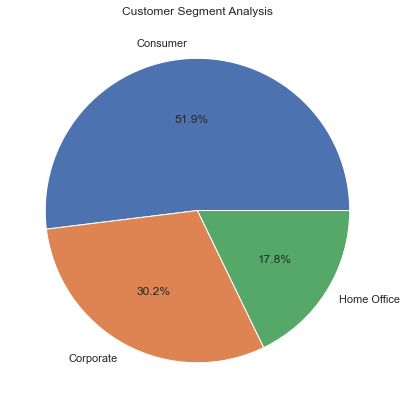

In [174]:
#to visualize the segment column
fig=plt.figure(figsize=(10,7))
plt.title('Customer Segment Analysis')
plt.pie(s_data['Segment'].value_counts(sort=True), labels=s_data.Segment.unique(),autopct='%1.1f%%')

Consumer are the highest buyers for the items

In [175]:
#displaying unique regions  
s_data.Region.unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

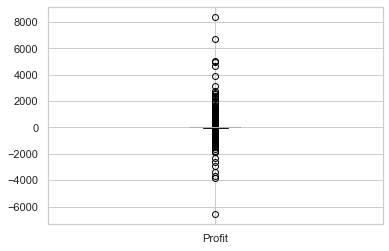

In [176]:
#visualizing profit

s_data.boxplot(column=['Profit'])
plt.show()

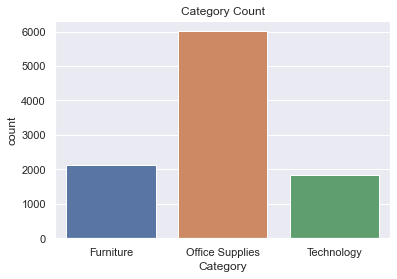

In [220]:
#get the total count of items of category column
sns.set_theme(style="darkgrid")
plt.title('Category Count')
ax = sns.countplot(x="Category",data=s_data)

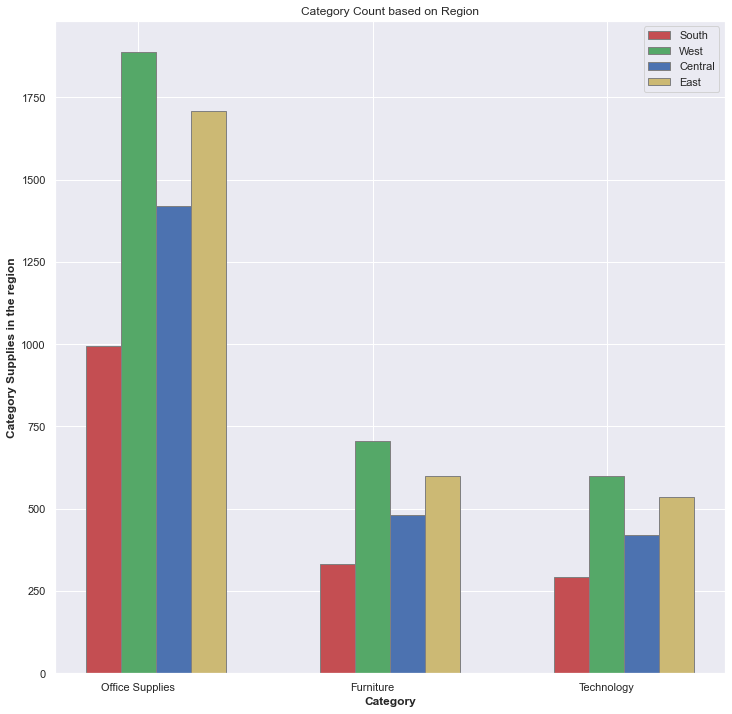

In [221]:
#visualization of supply of category in particular regions
barWidth=0.15
fig = plt.subplots(figsize =(12,12))
plt.title('Category Count based on Region')
br1= np.arange(3)
south_supply=np.array(s_data.loc[s_data['Region']=='South','Category'].value_counts())
west_supply=np.array(s_data.loc[s_data['Region']=='West','Category'].value_counts())
central_supply=np.array(s_data.loc[s_data['Region']=='Central','Category'].value_counts())
east_supply=np.array(s_data.loc[s_data['Region']=='East','Category'].value_counts())
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
plt.bar(br1,south_supply, color='r',width = barWidth, edgecolor = 'grey',label = 'South')
plt.bar(br2,west_supply, color='g',width = barWidth, edgecolor = 'grey',label = 'West')
plt.bar(br3,central_supply, color='b',width = barWidth, edgecolor = 'grey',label = 'Central')
plt.bar(br4,east_supply, color='y',width = barWidth, edgecolor = 'grey',label = 'East')
plt.xlabel('Category',fontweight='bold')
plt.ylabel('Category Supplies in the region',fontweight='bold')
plt.xticks([r + barWidth for r in range(s_data.Category.unique().shape[0])], 
           [ 'Office Supplies','Furniture', 'Technology']) 
plt.legend(labels=['South','West','Central','East'])   
plt.show() 



We can infer that office supplies has high count in all the regions. 

<AxesSubplot:title={'center':'Category Vs Sales'}, xlabel='Sales', ylabel='Category'>

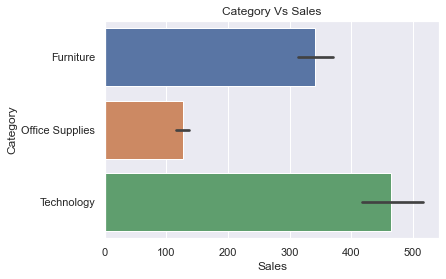

In [193]:
#to chech the sales of category items whose profit is greater than 1
plt.title('Category Vs Sales' )
category_profit=s_data[s_data['Profit']>1]
sns.barplot(data=s_data,y=category_profit['Category'],x=category_profit['Sales'])

Category Technology has the highest sales with postive profit greater than 1

In [194]:
#get total profit and sales for particular region
prof_sale=s_data.groupby('Region')['Profit','Sales'].agg(sum)
prof_sale

,Profit,Sales
Region,,
Central,39655.8752,500782.8528
East,91506.3092,678435.1960
South,46749.4303,391721.9050
West,108329.8079,725255.6365


Text(0.5, 1.0, 'Profit and Sales for Regions')

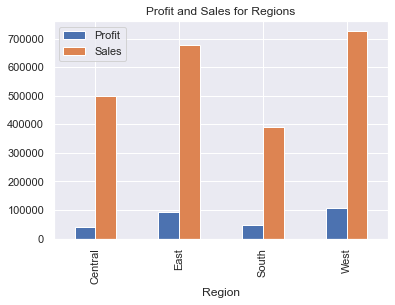

In [195]:
prof_sale.plot.bar()
plt.title('Profit and Sales for Regions')

The west region has highest profit and sales 

In [196]:
state_=s_data.groupby('State')['Sales','Profit'].agg(sum)
state_

,Sales,Profit
State,,
Alabama,19510.6400,5786.8253
Arizona,35282.0010,-3427.9246
Arkansas,11678.1300,4008.6871
California,457576.2715,76330.7891
Colorado,32108.1180,-6527.8579
Connecticut,13384.3570,3511.4918
Delaware,27451.0690,9977.3748
District of Columbia,2865.0200,1059.5893
Florida,89473.7080,-3399.3017


In [222]:
#get rows with sale>4000 and profit>mean(profit)
high_sale=s_data[(s_data['Sales']>4000) & (s_data['Profit']>s_data['Profit'].mean())]
high_sale.head(n=high_sale.shape[0])

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
353,First Class,Home Office,United States,New York City,New York,10009,East,Office Supplies,Binders,4355.168,4,0.2,1415.4296
509,Standard Class,Consumer,United States,Atlanta,Georgia,30318,South,Office Supplies,Binders,6354.950,5,0.0,3177.4750
1085,Standard Class,Consumer,United States,Yonkers,New York,10701,East,Technology,Machines,4899.930,7,0.0,2400.9657
2492,Standard Class,Consumer,United States,Jamestown,New York,14701,East,Technology,Phones,4548.810,7,0.0,1228.1787
2505,Second Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Supplies,8187.650,5,0.0,327.5060
2623,First Class,Home Office,United States,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888
3280,Second Class,Corporate,United States,Alexandria,Virginia,22304,South,Office Supplies,Supplies,4164.050,5,0.0,83.2810
4098,Standard Class,Consumer,United States,Minneapolis,Minnesota,55407,Central,Office Supplies,Binders,9449.950,5,0.0,4630.4755
4190,Standard Class,Consumer,United States,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856
4218,First Class,Corporate,United States,San Francisco,California,94110,West,Technology,Machines,4799.984,2,0.2,359.9988


<AxesSubplot:title={'center':'State Vs Sale (high Profit and Sale)'}, xlabel='Sales', ylabel='State'>

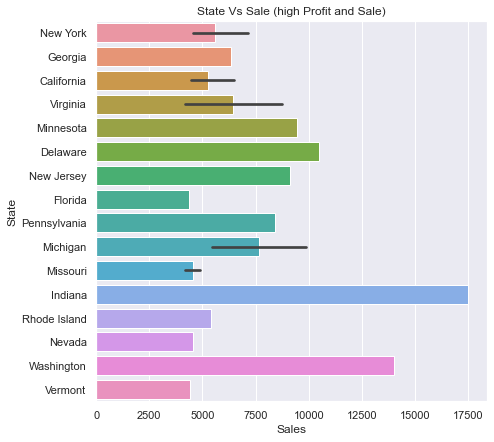

In [217]:
#plot highsale vs state
plt.figure(figsize=(7,7))
plt.title('State Vs Sale (high Profit and Sale)')
sns.barplot(data=s_data,y=high_sale['State'],x=high_sale['Sales'])

In [215]:
#getting rows with low profit an low sale 
low_state=s_data[(s_data['Sales']<500) & (s_data['Profit']<1)]
low_state.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.810,5,0.8,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.544,3,0.8,-3.8160
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.372,2,0.3,-1.0196
28,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Office Supplies,Binders,9.618,2,0.7,-7.0532
32,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Office Supplies,Binders,6.858,6,0.7,-5.7150


<AxesSubplot:title={'center':'State Vs Sale (low Profit and Sale)'}, xlabel='Sales', ylabel='State'>

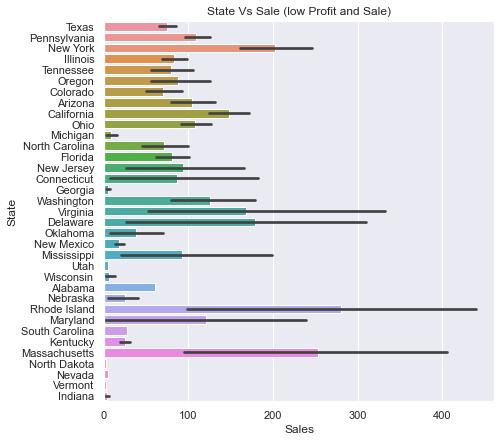

In [218]:
plt.figure(figsize=(7,7))
plt.title('State Vs Sale (low Profit and Sale)')
sns.barplot(data=low_state,y=low_state['State'],x=low_state['Sales'])

In [186]:
#get row with maximum sale

s_data.loc[s_data['Sales'].idxmax()]

Ship Mode       Standard Class
Segment            Home Office
Country          United States
City              Jacksonville
State                  Florida
Postal Code              32216
Region                   South
Category            Technology
Sub-Category          Machines
Sales               22638.4800
Quantity                     6
Discount                0.5000
Profit              -1811.0784
Name: 2697, dtype: object

In [187]:
#get row with least sale
s_data.loc[s_data['Sales'].idxmin()]

Ship Mode        Standard Class
Segment                Consumer
Country           United States
City                    Houston
State                     Texas
Postal Code               77095
Region                  Central
Category        Office Supplies
Sub-Category         Appliances
Sales                     0.444
Quantity                      1
Discount                  0.800
Profit                   -1.110
Name: 4101, dtype: object

In [188]:
#get row with maximum Profit
s_data.loc[s_data['Profit'].idxmax()]

Ship Mode       Standard Class
Segment              Corporate
Country          United States
City                 Lafayette
State                  Indiana
Postal Code              47905
Region                 Central
Category            Technology
Sub-Category           Copiers
Sales                17499.950
Quantity                     5
Discount                 0.000
Profit                8399.976
Name: 6826, dtype: object

In [189]:
#get row with least profit
s_data.loc[s_data['Sales'].idxmin()]

Ship Mode        Standard Class
Segment                Consumer
Country           United States
City                    Houston
State                     Texas
Postal Code               77095
Region                  Central
Category        Office Supplies
Sub-Category         Appliances
Sales                     0.444
Quantity                      1
Discount                  0.800
Profit                   -1.110
Name: 4101, dtype: object

These are the states with  low sale and low profit. 

In [223]:
#Quantity, Profit and Sales based on Sub-Category
subcat_=s_data.groupby('Sub-Category')['Quantity','Profit','Sales'].agg(sum)
subcat_

,Quantity,Profit,Sales
Sub-Category,,,
Accessories,2976,41936.6357,167380.3180
Appliances,1729,18138.0054,107532.1610
Art,2996,6524.6118,27107.0320
Binders,5971,30228.0003,203409.1690
Bookcases,868,-3472.5560,114879.9963
Chairs,2351,26567.1278,327777.7610
Copiers,234,55617.8249,149528.0300
Envelopes,906,6964.1767,16476.4020
Fasteners,914,949.5182,3024.2800


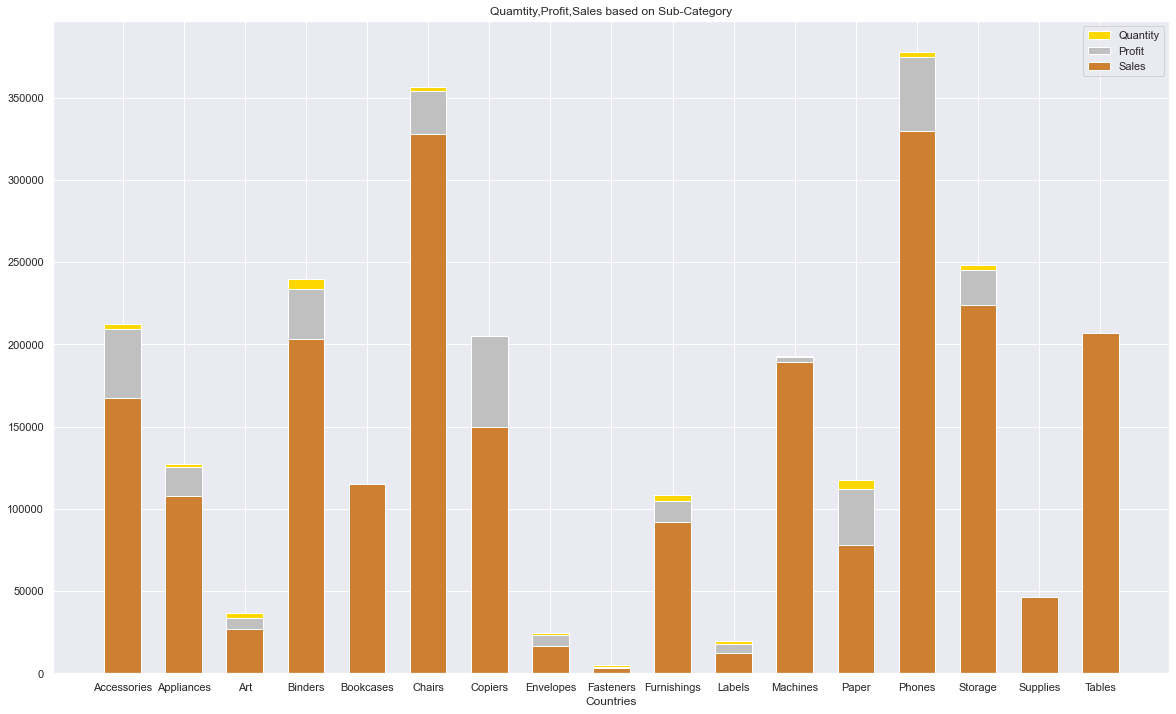

In [224]:
plt.figure(figsize=(20,12))
plt.bar(pqs.index, pqs['Quantity'], width=0.6, label='Quantity', color='gold', bottom=pqs['Profit']+pqs['Sales'])
plt.bar(pqs.index,pqs['Profit'], width=0.6, label='Profit', color='silver', bottom=pqs['Sales'])
plt.bar(pqs.index, pqs['Sales'], width=0.6, label='Sales', color='#CD7F32')
 


plt.xlabel("Countries")
plt.legend(loc="upper right")
plt.title("Quamtity,Profit,Sales based on Sub-Category")
plt.show()